<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes </em><br>

</div>

# Análisis de datos
*27 de Octubre de 2024*

**Nombre Estudiante(s)**: Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama

**1. Importación de Librerias**

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression



**2. Lectura de archivo**

Descripción del contexto: Determinar la demanda global de vinos dada la venta histórica

In [2]:
# Especifica la ruta del archivo Excel
file_path = r'..\data\VentaHistoricaVM.xlsx'

# Lee el archivo Excel
df = pd.read_excel(file_path, sheet_name='Hoja4')

# Mostrar las primeras filas del DataFrame
df.head(10)

,ano,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


In [3]:
# Cambiar el nombre de la columna 'ano' a 'año'
df.rename(columns={'ano': 'año'}, inplace=True)

# Mostrar las primeras filas del DataFrame
df.head(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


In [4]:
# Mostrar las últimas filas del DataFrame
df.tail(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
42442,2024,10.0,2332-9,VMSBREC24750,24,BRASIL,BRASIL,140.0,6160.000000,5.711244e+06
42443,2024,10.0,2332-9,VMVIU121750,21,BRASIL,BRASIL,15.0,8850.000000,8.205278e+06
42444,2024,10.0,5165-9,VMVIU821750,21,ASIA,KOREA,67.0,16750.000000,1.552976e+07
42445,2024,10.0,2332-9,VMVIU821750,21,BRASIL,BRASIL,6.0,1800.000000,1.668870e+06
42446,2024,10.0,10021-8,VMCAREC23750C 4X750,23,NORTE AMERICA,MEXICO,2590.0,138539.100000,1.266010e+08
42447,2024,11.0,10021-8,VMCAREC23750C 4X750,23,NORTE AMERICA,MEXICO,700.0,37443.000000,3.373277e+07
42448,2024,10.0,10021-8,VMCSGRE22750COSTCO,22,NORTE AMERICA,MEXICO,150.0,13950.000000,1.256769e+07
42449,2024,10.0,4022-3,VMCAGRE22750,22,EUROPA,ITALIA,2.0,110.472824,1.003347e+05
42450,2024,10.0,7355-5,VMVIU121750,21,EUROPA,POLONIA,1.0,475.033142,4.314394e+05
42451,2024,10.0,7355-5,VMVIU821750,21,EUROPA,POLONIA,1.5,450.729121,4.093657e+05


**3. Análisis exploratorio**

In [5]:
# Recopilación de información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   año          42452 non-null  int64  
 1   mes          42313 non-null  float64
 2   CodCliente   42418 non-null  object 
 3   codproducto  42265 non-null  object 
 4   cosecha      40292 non-null  object 
 5   mercado      42452 non-null  object 
 6   Pais         42303 non-null  object 
 7   Cajas9Lts    42452 non-null  float64
 8   MontoUSD     42452 non-null  float64
 9   MontoCLP     42452 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [6]:
# Resumen estadistico de las variables numericas
df.describe()

,año,mes,Cajas9Lts,MontoUSD,MontoCLP
count,42452.000000,42313.000000,42452.000000,4.245200e+04,4.245200e+04
mean,2014.784227,6.876634,109.286997,4.560297e+03,2.888807e+06
std,5.705123,3.381583,446.781091,1.467248e+04,6.196375e+06
min,1999.000000,1.000000,-560.000000,-2.500000e+04,-2.231554e+07
25%,2010.000000,4.000000,10.000000,6.380000e+02,4.443525e+05
50%,2015.000000,7.000000,38.000000,1.957000e+03,1.303261e+06
75%,2020.000000,10.000000,100.000000,4.620000e+03,3.056306e+06
max,2024.000000,12.000000,38640.000000,1.340072e+06,2.222784e+08


In [7]:
# Dimensiones del df
df.shape

(42452, 10)

In [8]:
# Total de elementos únicos por cada columna.
df.nunique()

año               26
mes               12
CodCliente       338
codproducto     1688
cosecha           33
mercado            8
Pais              98
Cajas9Lts       1739
MontoUSD       14924
MontoCLP       29243
dtype: int64

In [9]:
# Convertir todos los nombres de países a mayúsculas
df['Pais'] = df['Pais'].str.upper()

**4. Limpieza de datos**

**4.1 Busqueda de Valores Nulos**

In [10]:
# Filtrar y mostrar las filas con NaN
nan_rows = df[df.isna().any(axis=1)]

#print("Listado de filas con NaN:")
nan_rows.head(10)

,año,mes,CodCliente,codproducto,cosecha,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
0,1999,NaN,10008-0,NaN,NaN,NORTE AMERICA,USA,4575.0,130625.0,0.0
1,1999,NaN,NaN,NaN,NaN,NORTE AMERICA,USA,7098.0,228766.0,0.0
2,1999,NaN,3344-8,NaN,NaN,NORTE AMERICA,USA,1082.0,36700.0,0.0
3,1999,NaN,2222-5,NaN,NaN,NORTE AMERICA,USA,492.0,15068.0,0.0
4,1999,NaN,NaN,NaN,NaN,ASIA,NaN,4601.0,153235.0,0.0
5,1999,NaN,NaN,NaN,NaN,OCEANIA,NaN,1870.0,41220.0,0.0
6,1999,NaN,NaN,NaN,NaN,EUROPA,NaN,37785.0,1034419.0,0.0
7,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,ARGENTINA,386.0,11400.0,0.0
8,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,PERU,248.0,6193.0,0.0
9,1999,NaN,NaN,NaN,NaN,LATINOAMERICA,MEXICO,30.0,860.0,0.0


In [11]:
# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()
print("Valores NaN por columna:")
print(nan_count)

Valores NaN por columna:
año               0
mes             139
CodCliente       34
codproducto     187
cosecha        2160
mercado           0
Pais            149
Cajas9Lts         0
MontoUSD          0
MontoCLP          0
dtype: int64


In [12]:
#pip install missingno
import missingno as msgn

<Axes: >

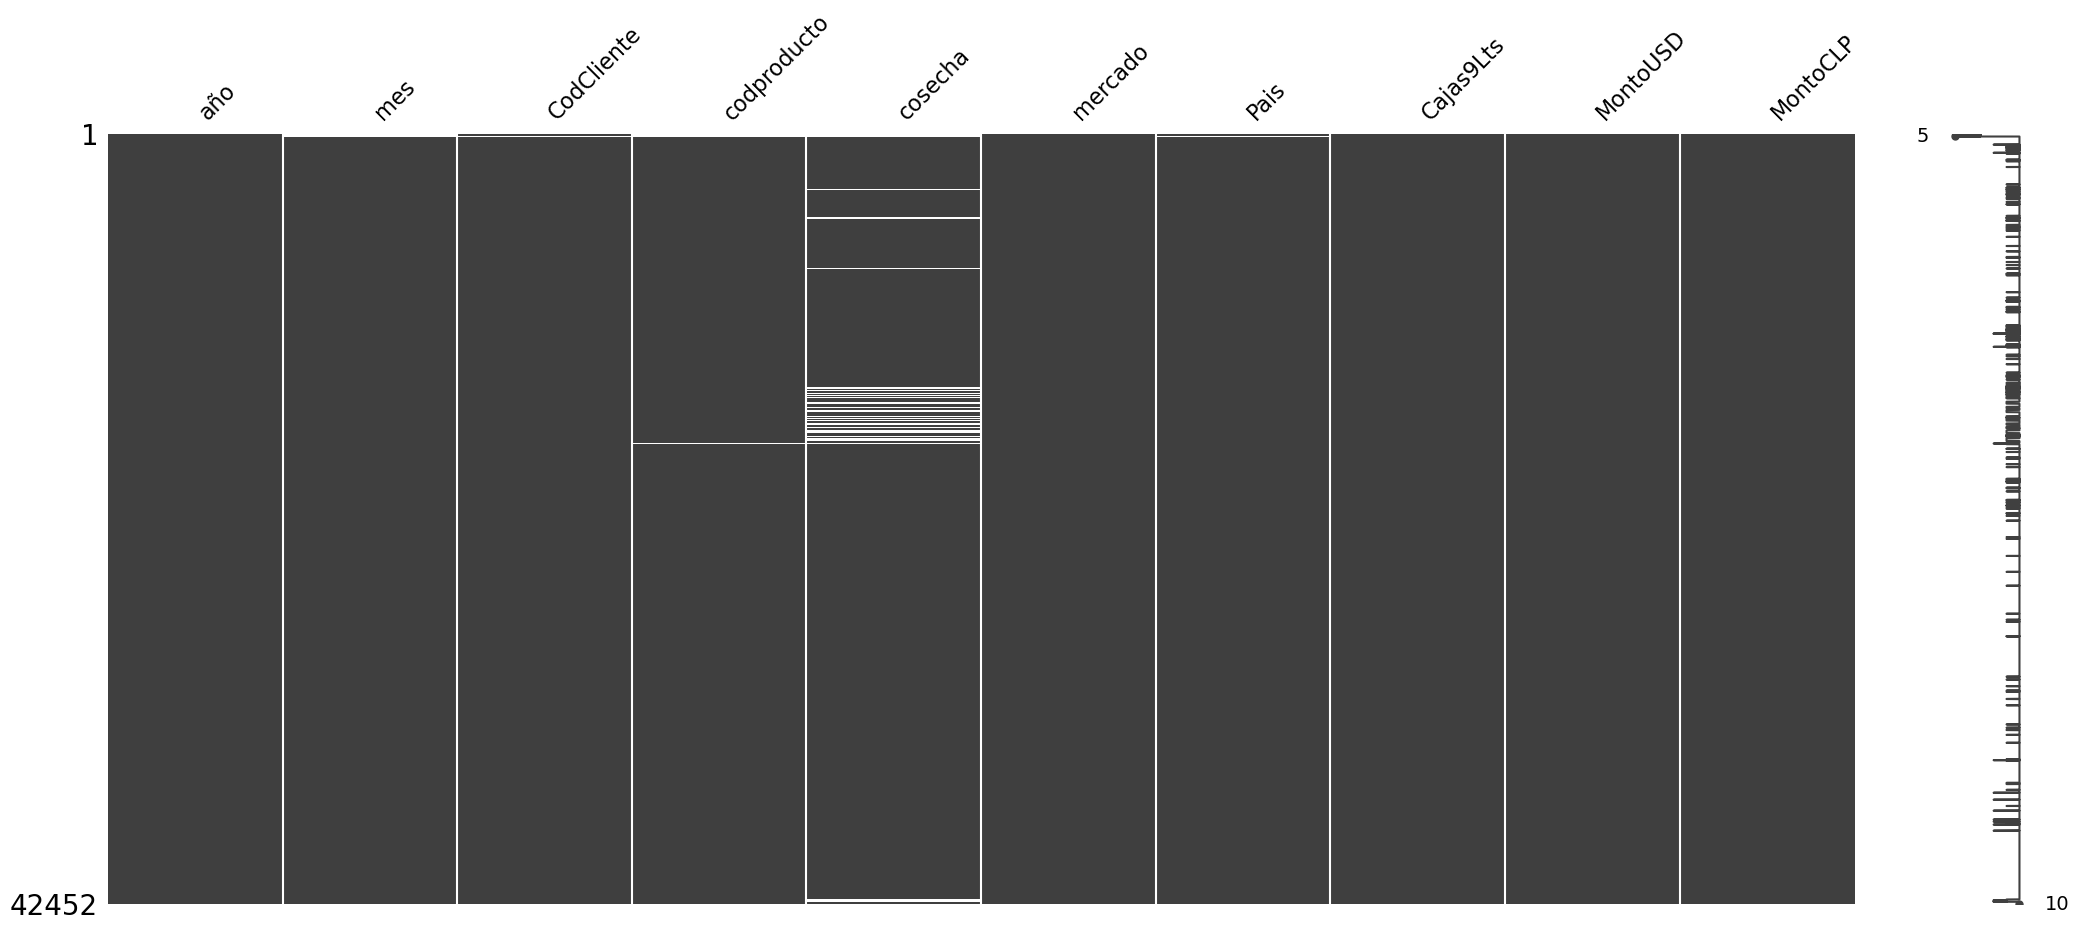

In [13]:
# Se visualiza los Nulos
msgn.matrix(df)

**4.2 Tratamiento de valores Nulos: campos 'mes' , 'CodCliente' y 'CodProducto'** 

In [14]:
# Filtrar las filas donde 'mes' es nulo
mes_nulos = df[df['mes'].isna()]

# Mostrar los años correspondientes a los valores nulos en 'mes'
años_con_mes_nulo = mes_nulos['año'].unique()

print("Años correspondientes a los valores nulos en 'mes':")
print(años_con_mes_nulo)

Años correspondientes a los valores nulos en 'mes':
[1999 2000 2001 2002 2003 2004]


In [15]:
# Filtrar las filas donde 'CodCliente' es nulo
cod_cliente_nulos = df[df['CodCliente'].isna()]

# Mostrar las primeras filas
print(cod_cliente_nulos.head(10))

# Mostrar cuántos registros tienen 'CodCliente' nulo
print(f"Total de registros con 'CodCliente' nulo: {len(cod_cliente_nulos)}")

     año  mes CodCliente codproducto cosecha        mercado       Pais  \
1   1999  NaN        NaN         NaN     NaN  NORTE AMERICA        USA   
4   1999  NaN        NaN         NaN     NaN           ASIA        NaN   
5   1999  NaN        NaN         NaN     NaN        OCEANIA        NaN   
6   1999  NaN        NaN         NaN     NaN         EUROPA        NaN   
7   1999  NaN        NaN         NaN     NaN  LATINOAMERICA  ARGENTINA   
8   1999  NaN        NaN         NaN     NaN  LATINOAMERICA       PERU   
9   1999  NaN        NaN         NaN     NaN  LATINOAMERICA     MEXICO   
11  2000  NaN        NaN         NaN     NaN           ASIA        NaN   
14  2000  NaN        NaN         NaN     NaN         EUROPA        NaN   
16  2000  NaN        NaN         NaN     NaN  NORTE AMERICA        USA   

    Cajas9Lts   MontoUSD  MontoCLP  
1      7098.0   228766.0       0.0  
4      4601.0   153235.0       0.0  
5      1870.0    41220.0       0.0  
6     37785.0  1034419.0       0.0  


Decisión: Se eliminan registros con valores NAN asociados a 'mes' y 'CodCliente' porque la mayoria pertecen a los registros con periodo 1999 hasta 2004 y representan el 0.5% del total de filas

In [16]:
# Eliminar filas con valores nulos en 'mes' y 'CodCliente'
df = df.dropna(subset=['mes', 'CodCliente', 'codproducto'])

# Mostrar la cantidad de filas después de la limpieza
print(f"Total de filas después de eliminar valores nulos: {len(df)}")

Total de filas después de eliminar valores nulos: 42265


**4.3 Tratamiento de valores Nulos: campo 'Cosecha'**

Desición: Lo que buscamos es determinar la demanda global de vinos dada la venta histórica, es por ello que eliminamos la variable cosecha.

In [17]:
# Eliminar la columna 'cosecha'
df.drop(columns=['cosecha'], inplace=True)

# Verificar que la columna ha sido eliminada
df.head()

,año,mes,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
139,2005,1.0,967510807,SECASE04750,CHILE,CHILE,10.0,432.0,293596.0
140,2005,1.0,967510807,SESYSE04750,CHILE,CHILE,10.0,432.0,293596.0
141,2005,1.0,967510807,VMMARE03750,CHILE,CHILE,12.0,518.0,352316.0
142,2005,1.0,967510807,VMSBRE04750,CHILE,CHILE,3.0,130.0,88079.0
143,2005,1.0,967510807,VMCSRE03750,CHILE,CHILE,5.0,216.0,146798.0


**4.4 Tratamiento de valores Nulos: campo 'Pais'**

Completar los valores nulos de la columna Pais basándonos en el 'mercado' y 'CodCliente' 

In [18]:
# Crear un diccionario basado en mercado, CodCliente y Pais (sin valores nulos)
mercado_cliente_pais = df.dropna(subset=['Pais']).groupby(['mercado', 'CodCliente'])['Pais'].first().to_dict()

# Función para rellenar los valores nulos de 'Pais'
def completar_pais(row):
    if pd.isna(row['Pais']):
        # Buscar en el diccionario el país basado en mercado y CodCliente
        return mercado_cliente_pais.get((row['mercado'], row['CodCliente']), None)
    else:
        return row['Pais']

# Aplicar la función a las filas con 'Pais' nulo
df['Pais'] = df.apply(completar_pais, axis=1)

# Mostrar las primeras filas para verificar los cambios
print(df[['mercado', 'CodCliente', 'Pais']].head(10))

# Verificar si quedan valores nulos
print(f"Valores nulos restantes en la columna 'Pais': {df['Pais'].isna().sum()}")


    mercado CodCliente   Pais
139   CHILE  967510807  CHILE
140   CHILE  967510807  CHILE
141   CHILE  967510807  CHILE
142   CHILE  967510807  CHILE
143   CHILE  967510807  CHILE
144   CHILE  967510807  CHILE
145   CHILE  967510807  CHILE
146   CHILE  967510807  CHILE
147   CHILE  967510807  CHILE
148   CHILE  967510807  CHILE
Valores nulos restantes en la columna 'Pais': 1


In [19]:
#evaluamos cual es el país que aun contiene NAN
df[df['Pais'].isna()]

,año,mes,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD,MontoCLP
10616,2010,2.0,2002-8,SESYSE08750,ASIA,None,56.0,3080.0,1673518.0


In [20]:
# Filtrar y mostrar las filas donde 'CodCliente' es igual a '2002-8'
codigo_cliente_filas = df[df['CodCliente'] == '2002-8']

# Mostrar las filas correspondientes
print(codigo_cliente_filas)

        año  mes CodCliente  codproducto mercado  Pais  Cajas9Lts  MontoUSD  \
10616  2010  2.0     2002-8  SESYSE08750    ASIA  None       56.0    3080.0   

        MontoCLP  
10616  1673518.0  


Desición: se elimina el unico registro con NAN de Pais porque no existen registros anteriores para el cliente: '2002-8' con los cuales comparar.

In [21]:
# Eliminar las filas donde 'CodCliente' es igual a '2002-8'
df= df[df['CodCliente'] != '2002-8']

# Verificar si las filas fueron eliminadas
print(f"Total de filas después de eliminar '2002-8': {len(df)}")


Total de filas después de eliminar '2002-8': 42264


In [22]:
# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()
print("Valores NaN por columna:")
print(nan_count)

Valores NaN por columna:
año            0
mes            0
CodCliente     0
codproducto    0
mercado        0
Pais           0
Cajas9Lts      0
MontoUSD       0
MontoCLP       0
dtype: int64


**5. Ingenieria de Columnas**

**5.1 Eliminar campo MontoCLP,** Solo nos quedaremos con el campo MontoUSD, que corresponde a las ventas en moneda dólar

In [23]:
# Eliminar la columna 'MontoCLP'
df.drop(columns=['MontoCLP'], inplace=True)

# Verificar que la columna ha sido eliminada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42264 entries, 139 to 42451
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   año          42264 non-null  int64  
 1   mes          42264 non-null  float64
 2   CodCliente   42264 non-null  object 
 3   codproducto  42264 non-null  object 
 4   mercado      42264 non-null  object 
 5   Pais         42264 non-null  object 
 6   Cajas9Lts    42264 non-null  float64
 7   MontoUSD     42264 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [24]:
# Convertir la columna 'mes' y 'año' a tipo entero
df['año'] = df['año'].astype(int)
df['mes'] = df['mes'].astype(int)

In [25]:
# Verificar si hay valores infinitos
print(df[['año', 'mes']].replace([np.inf, -np.inf], np.nan).isna().sum())


año    0
mes    0
dtype: int64


**5.2 Crear la columna Periodo,** combinando 'año' y 'mes', establecerla como indice y elimninar 'año' y 'mes'

In [26]:
# Crear la columna 'periodo' combinando 'año' y 'mes' con un separador
df['periodo'] = df['año'].astype(str) + '-' + df['mes'].astype(int).astype(str).str.zfill(2)

# Mostrar las primeras filas para verificar el resultado
print(df[['año', 'mes', 'periodo']].head())

      año  mes  periodo
139  2005    1  2005-01
140  2005    1  2005-01
141  2005    1  2005-01
142  2005    1  2005-01
143  2005    1  2005-01


In [27]:
# Colocar la columna 'periodo' como la primera y eliminar 'año' y 'mes'
df = df[['periodo'] + [col for col in df.columns if col not in ['año', 'mes', 'periodo']]]

# Verificar el nuevo DataFrame
df.head()


,periodo,CodCliente,codproducto,mercado,Pais,Cajas9Lts,MontoUSD
139,2005-01,967510807,SECASE04750,CHILE,CHILE,10.0,432.0
140,2005-01,967510807,SESYSE04750,CHILE,CHILE,10.0,432.0
141,2005-01,967510807,VMMARE03750,CHILE,CHILE,12.0,518.0
142,2005-01,967510807,VMSBRE04750,CHILE,CHILE,3.0,130.0
143,2005-01,967510807,VMCSRE03750,CHILE,CHILE,5.0,216.0


**6. Serie temporales**

Lo que buscamos es determinar la demanda global de vinos dada la venta histórica, es por ello que eliminamos variables tales como Codcliente, Codproducto, mercado y país

In [28]:
# Eliminar las columnas 'CodCliente', 'codproducto', 'mercado' y 'Pais'
df.drop(columns=['CodCliente', 'codproducto', 'mercado', 'Pais'], inplace=True)

# Verificar que las columnas han sido eliminadas
print(df.head())

     periodo  Cajas9Lts  MontoUSD
139  2005-01       10.0     432.0
140  2005-01       10.0     432.0
141  2005-01       12.0     518.0
142  2005-01        3.0     130.0
143  2005-01        5.0     216.0


Agrupar por Periodo

In [29]:
# Agrupar por 'periodo' y sumar los valores de 'Cajas9Lts' y 'MontoUSD'
df = df.groupby('periodo').sum().reset_index()

# Mostrar las primeras filas del DataFrame agrupado
print(df.head())


   periodo  Cajas9Lts  MontoUSD
0  2005-01     9828.0  326739.0
1  2005-02    12482.0  422192.0
2  2005-03    12542.0  396762.0
3  2005-04    13557.0  405280.0
4  2005-05    18870.0  613037.0


Agregamos variable Fecha

In [30]:
# Convertir 'periodo' a fecha usando el formato correcto 'YYYY-MM'
df['fecha'] = pd.to_datetime(df['periodo'].astype(str), format='%Y-%m')

# Reordenar las columnas para que 'fecha' esté en primer lugar
columnas = ['fecha'] + [col for col in df.columns if col != 'fecha']
df = df[columnas]

# Verificar las primeras filas
print(df.head())

       fecha  periodo  Cajas9Lts  MontoUSD
0 2005-01-01  2005-01     9828.0  326739.0
1 2005-02-01  2005-02    12482.0  422192.0
2 2005-03-01  2005-03    12542.0  396762.0
3 2005-04-01  2005-04    13557.0  405280.0
4 2005-05-01  2005-05    18870.0  613037.0


Normalizar las variables númericas

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas 'Cajas9Lts' y 'MontoUSD' y crear nuevas columnas para los datos normalizados
df['Cajas9Lts_norm'] = scaler.fit_transform(df[['Cajas9Lts']])
df['MontoUSD_norm'] = scaler.fit_transform(df[['MontoUSD']])

# Verificar las nuevas columnas normalizadas
print(df[['Cajas9Lts', 'Cajas9Lts_norm', 'MontoUSD', 'MontoUSD_norm']].head())


   Cajas9Lts  Cajas9Lts_norm  MontoUSD  MontoUSD_norm
0     9828.0        0.203997  326739.0       0.151360
1    12482.0        0.263310  422192.0       0.201302
2    12542.0        0.264651  396762.0       0.187997
3    13557.0        0.287335  405280.0       0.192453
4    18870.0        0.406073  613037.0       0.301152


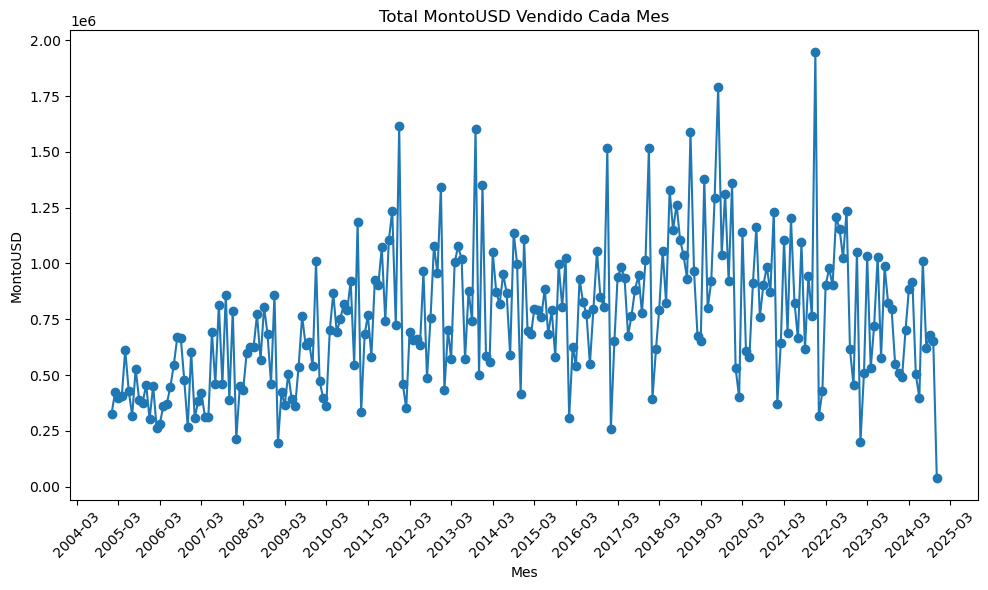

In [32]:
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y-%m')
# Agrupar por año y mes, sumando 'MontoUSD'
df_monthly = df.groupby('periodo', as_index=False)['MontoUSD'].sum()

# Graficar las ventas totales por mes
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['periodo'], df_monthly['MontoUSD'], marker='o')

# Añadir etiquetas y título
plt.title('Total MontoUSD Vendido Cada Mes')
plt.xlabel('Mes')
plt.ylabel('MontoUSD')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustar automáticamente las etiquetas del eje x para evitar superposición
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Mostrar cada interval meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Año-Mes

plt.tight_layout()
plt.show()

In [34]:
# Crear shifts
df_monthly['t-1']=df_monthly['MontoUSD'].shift(1) 
df_monthly['t-12']=df_monthly['MontoUSD'].shift(12)
# Botar Nans
df_monthly.dropna(inplace=True)

df_monthly.head()

,periodo,MontoUSD,t-1,t-12
12,2006-01-01,452437.0,302394.0,326739.0
13,2006-02-01,263808.0,452437.0,422192.0
14,2006-03-01,282101.0,263808.0,396762.0
15,2006-04-01,361765.0,282101.0,405280.0
16,2006-05-01,371528.0,361765.0,613037.0


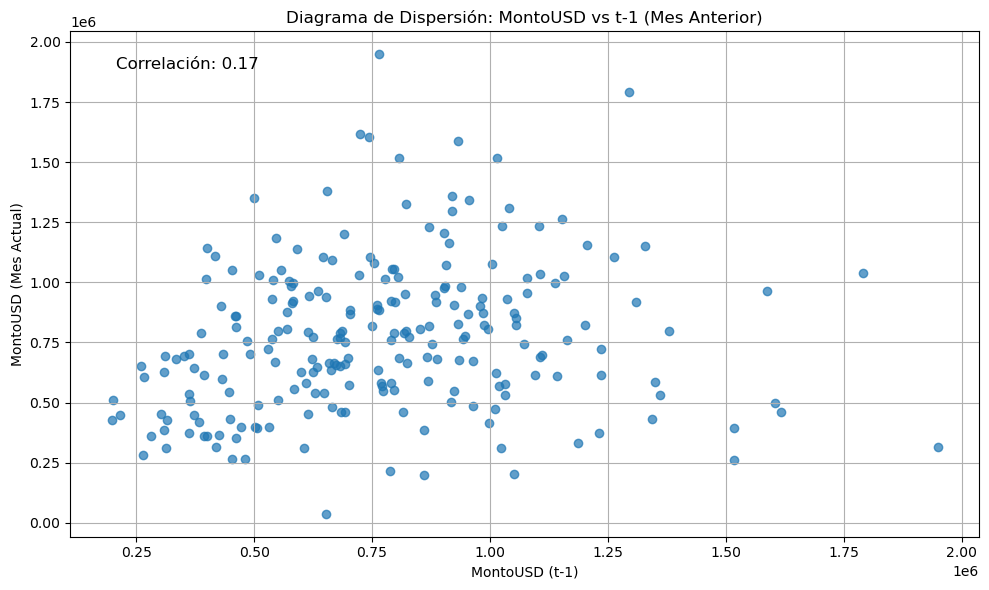

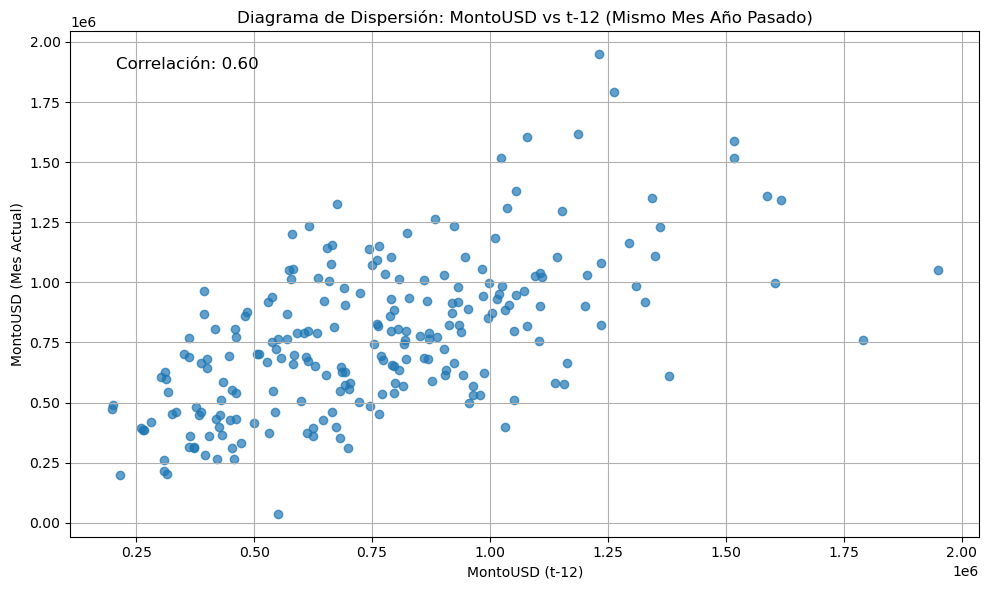

In [35]:
# Calcular correlaciones
corr_t1 = df_monthly['MontoUSD'].corr(df_monthly['t-1'])
corr_t12 = df_monthly['MontoUSD'].corr(df_monthly['t-12'])

# Crear gráfico de dispersión para t-1 (mes anterior)
plt.figure(figsize=(10, 6))
plt.scatter(df_monthly['t-1'], df_monthly['MontoUSD'], alpha=0.7)
plt.title('Diagrama de Dispersión: MontoUSD vs t-1 (Mes Anterior)')
plt.xlabel('MontoUSD (t-1)')
plt.ylabel('MontoUSD (Mes Actual)')
plt.grid(True)

# Agregar el valor de la correlación en la esquina superior izquierda
plt.text(0.05, 0.95, f'Correlación: {corr_t1:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         verticalalignment='top')

plt.tight_layout()
plt.show()

# Crear gráfico de dispersión para t-12 (mismo mes el año pasado)
plt.figure(figsize=(10, 6))
plt.scatter(df_monthly['t-12'], df_monthly['MontoUSD'], alpha=0.7)
plt.title('Diagrama de Dispersión: MontoUSD vs t-12 (Mismo Mes Año Pasado)')
plt.xlabel('MontoUSD (t-12)')
plt.ylabel('MontoUSD (Mes Actual)')
plt.grid(True)

# Agregar el valor de la correlación en la esquina superior izquierda
plt.text(0.05, 0.95, f'Correlación: {corr_t12:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         verticalalignment='top')

plt.tight_layout()
plt.show()

Creamos una segunda columna relacionada al MontoUSD utilizando shift

In [36]:
# Crear una nueva columna con los valores de 'MontoUSD' desplazados en 12 períodos (mismo mes del año anterior)
df['MontoUSD_t_12'] = df['MontoUSD'].shift(12)

# Verificar el resultado
print(df.head(15))  # Mostrar más filas para ver el efecto


        fecha    periodo  Cajas9Lts  MontoUSD  Cajas9Lts_norm  MontoUSD_norm  \
0  2005-01-01 2005-01-01     9828.0  326739.0        0.203997       0.151360   
1  2005-02-01 2005-02-01    12482.0  422192.0        0.263310       0.201302   
2  2005-03-01 2005-03-01    12542.0  396762.0        0.264651       0.187997   
3  2005-04-01 2005-04-01    13557.0  405280.0        0.287335       0.192453   
4  2005-05-01 2005-05-01    18870.0  613037.0        0.406073       0.301152   
5  2005-06-01 2005-06-01    14305.0  428516.0        0.304052       0.204610   
6  2005-07-01 2005-07-01     7938.0  318475.0        0.161759       0.147037   
7  2005-08-01 2005-08-01    13227.0  527185.0        0.279960       0.256234   
8  2005-09-01 2005-09-01    11277.0  386498.0        0.236380       0.182626   
9  2005-10-01 2005-10-01    12188.0  376402.0        0.256740       0.177344   
10 2005-11-01 2005-11-01    11394.0  457432.0        0.238995       0.219739   
11 2005-12-01 2005-12-01     9765.0  302

Eliminamos valores NAN

In [37]:
# Eliminar las filas que contienen valores NaN en cualquier columna
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 12 to 238
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           227 non-null    datetime64[ns]
 1   periodo         227 non-null    datetime64[ns]
 2   Cajas9Lts       227 non-null    float64       
 3   MontoUSD        227 non-null    float64       
 4   Cajas9Lts_norm  227 non-null    float64       
 5   MontoUSD_norm   227 non-null    float64       
 6   MontoUSD_t_12   227 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 14.2 KB


MontoUSD es la variable dependiente principal en este análisis de series temporales. Representa el valor en dólares de las ventas de vino a lo largo del tiempo. Esta columna captura la evolución de las ventas en diferentes países y mercados, y está directamente afectada por la cantidad de cajas vendidas y otros factores relacionados con la demanda y la oferta en el mercado del vino. Al modelar esta variable, se busca entender los patrones de comportamiento de las ventas para prever la demanda futura de vinos, específicamente en el año 2025.